## Test a random forest model on full dataset with crime data

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.

import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)

import process
from modeling import categorize

Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [4]:
test_data,val_data = process.get_split_add_data(db_name='traffic_joined_with_features_plus_crimes')
val_data

urban  rural  institutionalized_all  institutionalized_adult_all  institutionalized_adult_federal_detention_all  institutionalized_adult_federal_prison_all  institutionalized_adult_state_prison_all  institutionalized_adult_local_jail_all  institutionalized_juvenile_all  institutionalized_white  institutionalized_adult_white  institutionalized_adult_federal_detention_white  institutionalized_adult_federal_prison_white  institutionalized_adult_state_prison_white  institutionalized_adult_local_jail_white  institutionalized_juvenile_white  institutionalized_black  institutionalized_adult_black  institutionalized_adult_federal_detention_black  institutionalized_adult_federal_prison_black  institutionalized_adult_state_prison_black  institutionalized_adult_local_jail_black  institutionalized_juvenile_black  population_white  population_black  total_income_estimate_all  total_income_estimate_white  total_income_estimate_black  swnauthemp  swnftemp                 ...                  numothunm_per_capita  numplanes_per_capita  numcopters_per_capita  numboats_per_capita  nummotor_per_capita  numcarcam_per_capita  numfixcam_per_capita  nummobcam_per_capita  violent_crime_total_per_capita  murder_and_nonnegligent_manslaughter_per_capita  forcible_rape_per_capita  robbery_per_capita  aggravated_assault_per_capita  property_crime_total_per_capita  burglary_per_capita  larceny_theft_per_capita  motor_vehicle_theft_per_capita      rpsi  black_over_white_population_disparity  black_over_white_income_disparity  black_over_white_institutionalized_disparity  black_over_white_institutionalized_adult_disparity  black_over_white_institutionalized_adult_federal_detention_disparity  black_over_white_institutionalized_adult_federal_prison_disparity  black_over_white_institutionalized_adult_state_prison_disparity  black_over_white_institutionalized_adult_local_jail_disparity  black_over_white_institutionalized_juvenile_disparity  black_officer_disparity  white_officer_disparity  black_over_white_officer_disparity
surveyid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [5]:
val_data.to_sql('val_data',process.engine,if_exists='replace')



In [ ]:
val_data

# Build Model

In [31]:
processor = process.Processor(val_data)
X_val,y_val_cat = processor.get_scaled_Xy(val_data)
X_test,y_test_cat = processor.get_scaled_Xy(test_data)

In [7]:
test_data

urban  rural  institutionalized_all  institutionalized_adult_all  institutionalized_adult_federal_detention_all  institutionalized_adult_federal_prison_all  institutionalized_adult_state_prison_all  institutionalized_adult_local_jail_all  institutionalized_juvenile_all  institutionalized_white  institutionalized_adult_white  institutionalized_adult_federal_detention_white  institutionalized_adult_federal_prison_white  institutionalized_adult_state_prison_white  institutionalized_adult_local_jail_white  institutionalized_juvenile_white  institutionalized_black  institutionalized_adult_black  institutionalized_adult_federal_detention_black  institutionalized_adult_federal_prison_black  institutionalized_adult_state_prison_black  institutionalized_adult_local_jail_black  institutionalized_juvenile_black  population_white  population_black  total_income_estimate_all  total_income_estimate_white  total_income_estimate_black  swnauthemp  swnftemp                 ...                  numothunm_per_capita  numplanes_per_capita  numcopters_per_capita  numboats_per_capita  nummotor_per_capita  numcarcam_per_capita  numfixcam_per_capita  nummobcam_per_capita  violent_crime_total_per_capita  murder_and_nonnegligent_manslaughter_per_capita  forcible_rape_per_capita  robbery_per_capita  aggravated_assault_per_capita  property_crime_total_per_capita  burglary_per_capita  larceny_theft_per_capita  motor_vehicle_theft_per_capita      rpsi  black_over_white_population_disparity  black_over_white_income_disparity  black_over_white_institutionalized_disparity  black_over_white_institutionalized_adult_disparity  black_over_white_institutionalized_adult_federal_detention_disparity  black_over_white_institutionalized_adult_federal_prison_disparity  black_over_white_institutionalized_adult_state_prison_disparity  black_over_white_institutionalized_adult_local_jail_disparity  black_over_white_institutionalized_juvenile_disparity  black_officer_disparity  white_officer_disparity  black_over_white_officer_disparity
surveyid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
val_data_scaled = pd.DataFrame(np.c_[X_val,y_val_cat],index=val_data.index,columns=val_data.drop('rpsi',1).columns.tolist()+['rpsi'])
val_data_scaled.to_sql('val_data_scaled',process.engine,if_exists='replace')#print X_val+y_val

(array([  1.,   0.,   0.,   0.,   0.,   6.,   7.,  11.,  16.,  11.,  12.,
         10.,   6.,   7.,   6.,   9.,   5.,   4.,   4.,   2.,   2.,   0.,
          3.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.16859229,  0.33718458,  0.50577687,  0.67436916,
         0.84296145,  1.01155374,  1.18014603,  1.34873832,  1.51733061,
         1.6859229 ,  1.85451519,  2.02310748,  2.19169977,  2.36029206,
         2.52888435,  2.69747664,  2.86606892,  3.03466121,  3.2032535 ,
         3.37184579,  3.54043808,  3.70903037,  3.87762266,  4.04621495,
         4.21480724,  4.38339953,  4.55199182,  4.72058411,  4.8891764 ,
         5.05776869,  5.22636098,  5.39495327,  5.56354556,  5.73213785,
         5.90073014,  6.06932243,  6.23791472,  6.40650701,  6.5750993 ,
         6.74369159]),
 <a list of 40 Patch objects>)

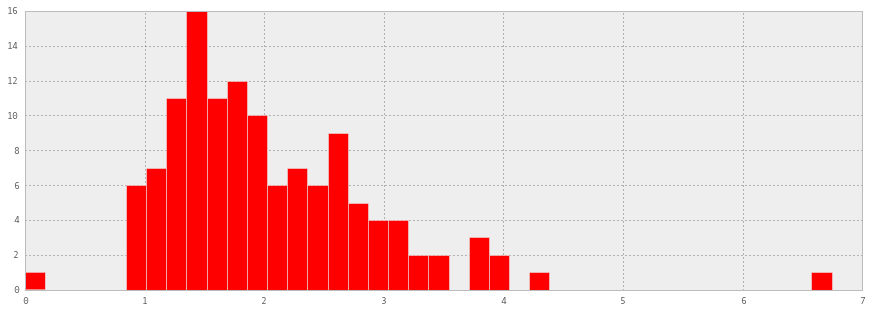

In [9]:
plt.hist(val_data['rpsi'].tolist(),bins=40)

In [10]:
for cat in sort(val_data_scaled['rpsi'].unique().tolist()):
    
    print cat, shape(val_data_scaled[val_data_scaled['rpsi']==cat])[0]

0.0 21
1.0 70
2.0 35


In [11]:
from sklearn import linear_model,cross_validation,metrics,grid_search

from sklearn.ensemble import RandomForestClassifier
values = range(10,80,10)
n_iter = len(values)
param_grid = {'n_estimators': values,
             'max_features': values}
clf = RandomForestClassifier(n_jobs=2)
clfmodel = grid_search.RandomizedSearchCV(clf,param_grid,
                                          n_iter*n_iter,cv=5,verbose=1,random_state=2)
clfmodel.fit(X_val,y_val_cat)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   18.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.3min


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=49, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70], 'max_features': [10, 20, 30, 40, 50, 60, 70]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          scoring=None, verbose=1)

In [12]:
print clfmodel.best_params_
print clfmodel.best_score_
features = []
importances = []
for feature,importance in zip(val_data.drop('rpsi',1).columns.tolist(),clfmodel.best_estimator_.feature_importances_):
    #print feature,importance
    features.append(feature)
    importances.append(importance)
indices = [i[0] for i in sorted(enumerate(importances), key=lambda x:x[1])]
best_feature_names = []
for index in reversed(indices):
    print features[index],importances[index]
    if importances[index] < 0.005:
        continue
    best_feature_names.append(features[index])
print len(best_feature_names)

{'n_estimators': 20, 'max_features': 50}
0.690476190476
totacad 0.0867799888464
sgtmin 0.0436368009729
numrespoff_per_capita 0.0311345502717
black_over_white_income_disparity 0.0237870044271
forcible_rape_per_capita 0.0237695640918
civftemp_per_capita 0.0219057175327
entrymax 0.0208793329943
sgtmax 0.0194784982665
motor_vehicle_theft_per_capita 0.0193042651958
entrymin 0.0188614208226
black_officer_disparity 0.0185954792648
rural_per_capita 0.0185911734586
black_over_white_population_disparity 0.0179050661993
nummrkcars_per_capita 0.016798793364
swnauthemp_per_capita 0.0166515975876
urban 0.0166138465443
institutionalized_juvenile_black_per_capita 0.015620032173
total_income_estimate_black_per_capita 0.0150783400517
burglary_per_capita 0.0142281408588
numfixcam_per_capita 0.0141137917178
robbery 0.0133542213936
black_over_white_officer_disparity 0.0133026701113
institutionalized_juvenile_white_per_capita 0.012620723766
institutionalized_juvenile_all_per_capita 0.0125862860113
instituti

In [19]:
import pickle
pickle.dump(best_feature_names,open('best_features_names_with_crime.p','wb'))


In [20]:
import pickle
best_feature_names = pickle.load(open('best_features_names_with_crime.p','rb'))
print best_feature_names

['totacad', 'sgtmin', 'numrespoff_per_capita', 'black_over_white_income_disparity', 'forcible_rape_per_capita', 'civftemp_per_capita', 'entrymax', 'sgtmax', 'motor_vehicle_theft_per_capita', 'entrymin', 'black_officer_disparity', 'rural_per_capita', 'black_over_white_population_disparity', 'nummrkcars_per_capita', 'swnauthemp_per_capita', 'urban', 'institutionalized_juvenile_black_per_capita', 'total_income_estimate_black_per_capita', 'burglary_per_capita', 'numfixcam_per_capita', 'robbery', 'black_over_white_officer_disparity', 'institutionalized_juvenile_white_per_capita', 'institutionalized_juvenile_all_per_capita', 'institutionalized_juvenile_white', 'totinsrv', 'numumkcars_per_capita', 'institutionalized_white', 'sgtmax_per_capita', 'institutionalized_white_per_capita', 'rural', 'total', 'swnauthemp', 'male_per_capita', 'chiefmax', 'institutionalized_all_per_capita', 'totinsrv_per_capita', 'female', 'total_income_estimate_black', 'ftdrugoff_per_capita', 'drugforf_per_capita', 'ins

In [13]:
processor = process.Processor(val_data[best_feature_names+['rpsi']])
X_val,y_val_cat = processor.get_scaled_Xy(val_data[best_feature_names+['rpsi']])
X_test,y_test_cat = processor.get_scaled_Xy(test_data[best_feature_names+['rpsi']])



In [14]:
from sklearn.ensemble import RandomForestClassifier
values = range(10,shape(X_val)[1],5)
n_iter = len(values)
param_grid = {'n_estimators': values,
             'max_features': values}
clf2 = RandomForestClassifier()
clfmodel2 = grid_search.RandomizedSearchCV(clf2,param_grid,
                                          n_iter*n_iter,cv=5,verbose=1,random_state=2)
clfmodel2.fit(X_val,y_val_cat)
print clfmodel2.best_params_
print clfmodel2.best_score_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   49.2s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   56.1s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 25, 'max_features': 45}
0.68253968254


In [28]:
clfmodel2.grid_scores_

[mean: 0.61111, std: 0.07574, params: {'n_estimators': 10, 'max_features': 10},
 mean: 0.65873, std: 0.05691, params: {'n_estimators': 15, 'max_features': 10},
 mean: 0.58730, std: 0.05550, params: {'n_estimators': 20, 'max_features': 10},
 mean: 0.64286, std: 0.05969, params: {'n_estimators': 25, 'max_features': 10},
 mean: 0.64286, std: 0.03874, params: {'n_estimators': 30, 'max_features': 10},
 mean: 0.61905, std: 0.08440, params: {'n_estimators': 35, 'max_features': 10},
 mean: 0.66667, std: 0.06072, params: {'n_estimators': 40, 'max_features': 10},
 mean: 0.63492, std: 0.04873, params: {'n_estimators': 45, 'max_features': 10},
 mean: 0.66667, std: 0.06485, params: {'n_estimators': 50, 'max_features': 10},
 mean: 0.65079, std: 0.04650, params: {'n_estimators': 55, 'max_features': 10},
 mean: 0.62698, std: 0.05358, params: {'n_estimators': 10, 'max_features': 15},
 mean: 0.59524, std: 0.04478, params: {'n_estimators': 15, 'max_features': 15},
 mean: 0.63492, std: 0.05742, params: {'

In [29]:
est =  clfmodel.best_estimator_
print est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [21]:
import pickle
pickle.dump(est,open('randomforestclassifier_with_crime.p','wb'))

In [22]:
est = pickle.load(open('randomforestclassifier_with_crime.p','rb'))
print est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=45, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [32]:
#classification
nmatch = 0
total = 0
for prediction, actual, ismatch in zip(est.predict(X_test),y_test_cat,est.predict(X_test)==y_test_cat):
    if ismatch:
        nmatch+=1
    total+=1

print "test accuracy =",float(nmatch)/float(total)
print "total",total

test accuracy = 0.46875
total 32


array([[1, 3, 2],
       [2, 8, 6],
       [0, 4, 6]])

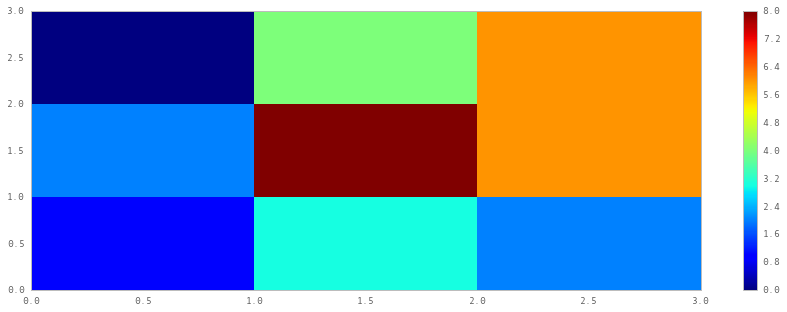

In [34]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_cat,est.predict(X_test))
plt.pcolor(matrix.T.T)
plt.colorbar()
matrix

In [ ]:
sql_query = """
    SELECT  * FROM traffic_joined_with_features;
    """
data = add_features(get_data())

descriptors = []
descriptors = ['agency','city','state','zipcode']
test = pd.read_sql_query(sql_query,con).drop('index',axis=1)
test = test[test['surveyid'].isin(data.index.tolist())]
#test = test.merge(data,how='right',right_on='surveyid')
#data = add_features(get_data())[best_feature_names+['agency']]
#test
test = test.sort(columns='surveyid').set_index('surveyid',drop=True)
test = test[descriptors]
test
sorted_data = data.sort_index()
sorted_data = sorted_data[best_feature_names]
output = pd.concat([test,sorted_data],axis=1)
output

In [ ]:
import pickle
#clf = pickle.load(open('randomforestclassifier.p','rb'))
best_feature_names = pickle.load(open('best_features_names.p','rb'))

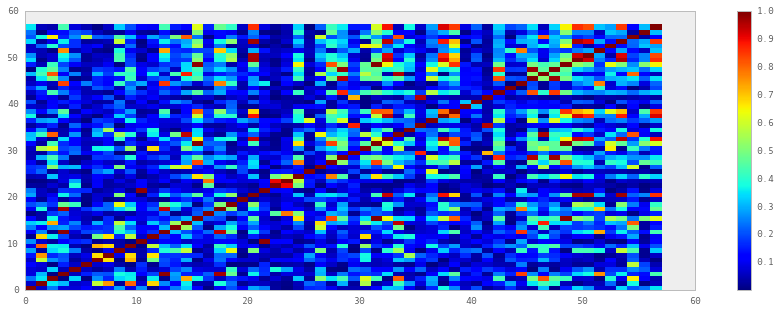

In [24]:
plt.pcolor(np.abs(np.corrcoef((X_val.T))))
plt.colorbar()